In [1]:
from pyro.infer import SVI, infer_discrete, TraceEnum_ELBO, TraceGraph_ELBO
from anneal.Interface import Interface
from anneal.models.MixtureGaussian import MixtureGaussian
from anneal.models.MixtureDirichlet import MixtureDirichlet
from anneal.models.MixtureGaussianDMP import MixtureGaussianDMP
from anneal.models.MixtureCategorical import MixtureCategorical
from anneal.models.HmmMIxtureRNA import HmmMixtureRNA
from anneal.models.HmmSimple import HmmSimple

import pyro
from pyro.optim import ClippedAdam
import anneal.utils 

from importlib import reload  



interface = Interface()
interface.set_model(MixtureGaussian)
interface.set_loss(TraceEnum_ELBO)
interface.set_optimizer(ClippedAdam)

data_dict = anneal.utils.load_simulation_seg("data", "example1")
data_dict

{'data': tensor([[45., 36., 42.,  ..., 50., 47., 42.],
         [55., 55., 60.,  ..., 76., 88., 89.],
         [32., 14., 27.,  ..., 34., 32., 42.],
         ...,
         [43., 33., 43.,  ..., 53., 53., 51.],
         [13.,  3., 12.,  ..., 21., 19.,  9.],
         [28., 21., 40.,  ..., 45., 50., 46.]]),
 'pld': tensor([2.0000, 2.0000, 1.0000, 2.0000, 2.0000, 2.0000, 2.0000, 1.3000, 2.0000,
         2.0000, 1.0000, 1.7000, 2.0000, 2.0000, 3.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 3.0000, 1.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 1.0000, 2.0000]),
 'segments': 32,
 'mu': tensor([12, 17, 14, 13,  8, 12, 29, 11, 12, 24, 15, 15, 12, 15, 11,  9, 13,  9,
         12, 26, 20, 17, 16,  8,  8, 15, 16, 13,  9, 11,  7,  9])}

In [2]:
pyro.enable_validation(True)
interface.initialize_model(data_dict)
interface.set_model_params({'gamma_multiplier': 5})

loss = interface.run(500, MAP = False, param_optimizer={"lr" : 0.05 }, verbose=False
                     )

Running MixtureGaussian on 1000 cells for 500 steps
..........

..........

..........

..........

..........

Done!


In [3]:

lr = interface.learned_parameters(posterior=False, verbose=False)
print(lr)

{'param_weights': array([0.47740242, 0.5225976 ], dtype=float32), 'param_cnv_mean': array([[0.46717554, 0.45824188, 0.23508169, 0.461716  , 0.46652818,
        0.4648256 , 0.4674955 , 0.3096633 , 0.4732958 , 0.45569342,
        0.23300174, 0.3722474 , 0.46123886, 0.46817157, 0.6957535 ,
        0.4551933 , 0.46135673, 0.46418852, 0.4650507 , 0.69047314,
        0.23983657, 0.47244716, 0.4738221 , 0.46119153, 0.4614214 ,
        0.45642537, 0.45685393, 0.46161914, 0.46891582, 0.45313278,
        0.23175511, 0.4659696 ],
       [0.28714165, 0.28888956, 0.14617768, 0.29219258, 0.28863323,
        0.28246844, 0.28620243, 0.18114564, 0.28745702, 0.28901935,
        0.1451249 , 0.24737102, 0.28752443, 0.27808276, 0.43420222,
        0.2897762 , 0.28122705, 0.28356025, 0.28681138, 0.42288977,
        0.1434092 , 0.29356977, 0.2966133 , 0.28988406, 0.2841918 ,
        0.29095358, 0.29332954, 0.30286008, 0.28806022, 0.28573647,
        0.1421529 , 0.28498647]], dtype=float32), 'param_cnv_var': 

Running MixtureCategorical on 1000 cells for 200 steps
..........

..........

Done!
{'param_gamma_MAP': array([1.4832428 , 0.7425976 , 2.0843253 , 1.6210353 , 1.3281354 ,
       2.0240614 , 2.695611  , 1.5133455 , 2.373366  , 2.1141245 ,
       0.981662  , 1.7639779 , 1.3899239 , 1.273275  , 1.1248147 ,
       1.8481612 , 1.3890164 , 1.3002045 , 1.7335079 , 0.9824224 ,
       2.397532  , 1.9470481 , 0.8569496 , 2.2049108 , 3.131175  ,
       1.3294632 , 1.099621  , 2.0077903 , 0.94124055, 1.0997843 ,
       1.7639841 , 1.3732029 , 3.2531333 , 1.6145532 , 3.2910814 ,
       1.1354703 , 0.7307177 , 1.3771316 , 1.8609464 , 1.4891112 ,
       1.9244992 , 2.6263618 , 1.7774895 , 1.9040855 , 2.673811  ,
       1.4327359 , 2.4579473 , 2.1686451 , 1.4144962 , 1.2129563 ,
       1.7010547 , 2.406656  , 2.4697788 , 1.9156382 , 1.3854091 ,
       1.7438525 , 1.3432477 , 2.0792494 , 0.89930505, 1.5257232 ,
       4.409853  , 4.0464063 , 0.67350245, 1.3718026 , 1.2604917 ,
       1.1895409 , 1.317

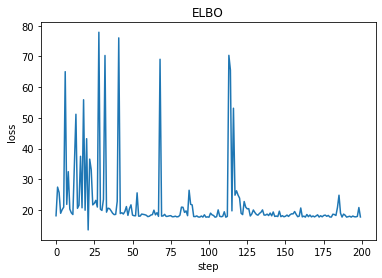

In [1]:
import torch
import pyro.distributions as dist

pyro.set_rng_seed(3)
N = 1000
gamma = dist.Gamma(6,2).sample([N])
groups = torch.ones((2,N))
groups[0,int(N*0.6):N] = 2
baselines = torch.tensor([30,50]).reshape([2,1])
data = dist.Poisson(gamma * groups * baselines).sample()


import anneal as an
from anneal.models.MixtureCategorical import MixtureCategorical
from anneal.models.MixtureGaussian import MixtureGaussian

data_dict = {'data': data, 'segments' : 2, 'mu' : torch.tensor([30,50]), 'pld' : torch.tensor([1.6,1.6])}

params, loss = an.utils.run_analysis(data_dict, MixtureCategorical, steps=200, lr=0.3, MAP=True)
print(params)

In [2]:
import pyro
from pyro.ops.indexing import Vindex
from torch.distributions import constraints
import torch




def model(data, baselines):

    weights = pyro.sample('mixture_weights', dist.Dirichlet(torch.ones(2) / 2))

    with pyro.plate('segments', 2):
        with pyro.plate('groups', 2):
            # suppose here I don't know the number of groups and I set an upper bound
            group = pyro.sample("cc", dist.Categorical(torch.ones(4) / 4))

    with pyro.plate('data', 1000):
        theta = pyro.sample('norm_factor', dist.Gamma(3,1))
        assignment = pyro.sample('assignment', dist.Categorical(weights), infer={"enumerate": "parallel"})
        for i in pyro.plate('segments2', 2):
            pyro.sample('obs_{}'.format(i), dist.Poisson((Vindex(group)[...,assignment,i] * theta * baselines[i])+ 1e-8), obs=data[i, :])
        

In [3]:
def guide(data, baselines):

    mix_weights = pyro.param("param_weights", lambda: torch.ones(2) / 2,
                                   constraint=constraints.simplex)
    
    hidden_weights = pyro.param("param_hidden_weights", lambda:  torch.ones(4) / 4,
                           constraint=constraints.simplex)
    
    gamma_MAP = pyro.param("param_gamma_MAP", lambda : torch.mean((data/baselines), axis = 0),
                constraint=constraints.positive)
    
    pyro.sample('mixture_weights', dist.Dirichlet(mix_weights))
    
    with pyro.plate('segments', 2):
        with pyro.plate('groups', 2):
            pyro.sample("cc", dist.Categorical(hidden_weights))
    with pyro.plate('data', N):
        pyro.sample('norm_factor', dist.Delta(gamma_MAP))


In [4]:
from pyro.optim import ClippedAdam
from pyro.infer import SVI, TraceEnum_ELBO


svi = SVI(model, guide, ClippedAdam({'lr': 0.01}), TraceEnum_ELBO(max_plate_nesting=2))
steps = 400
for i in range(steps):
    print(svi.step(data,baselines))

381786.7550390625
638479.2994921876
477525.64292968746
686797.1785546874
563063.9957421877
653434.36734375
446893.01367187506
549819.8684374999
657627.3875781251
704360.1701171875
862533.5111328126
451784.5139257813
962431.8650781251
618479.7750976563
785002.4378515626
753313.183828125
569221.2753515625
620862.0858593751
321844.50160156254
597018.5987890626
454417.78164062503
388095.0051171875
782006.9360937501
901872.7470312499
826409.802890625
885680.4261132813
558888.8737109372
707268.9644140622
995258.1701562498
478704.46658203116
1110155.4504296877
343782.21515625
432266.5811718751
871701.9172656249
589757.8376171876
500128.26205078134
598881.7997265621
598793.8001953124
293500.67171875003
649240.1775585939
491484.6300585937
277569.0213476562
622373.6566992188
779444.07078125
636895.2519531249
559277.8158984373
513475.2486328126
443767.52757812495
619678.0079882813
720492.9344140626
616013.2674804688
565007.3695898438
664919.4074414062
613839.3979296876
777004.8951757813
280801.83

In [5]:
pyro.get_param_store().match("param")

{'param_gamma_MAP': tensor([1.4366, 0.7099, 1.0228, 1.5504, 1.2959, 0.9970, 2.6073, 1.4463, 1.1546,
         2.0289, 0.9329, 1.6921, 1.3346, 1.2113, 1.0696, 1.7798, 1.3307, 1.2534,
         1.6669, 0.9342, 2.2986, 1.8693, 0.8139, 1.0737, 3.0309, 1.2680, 1.0474,
         1.9246, 0.8908, 1.0453, 1.7095, 1.3036, 1.5943, 0.7867, 3.1864, 1.0965,
         0.6971, 1.3226, 1.7861, 1.4242, 1.8857, 1.2781, 1.7042, 1.8282, 2.5854,
         1.3755, 1.2104, 1.0558, 1.3671, 1.1792, 1.6269, 2.3168, 1.2107, 1.8423,
         1.3145, 1.6863, 1.2798, 2.0067, 0.8570, 1.4645, 2.1678, 3.9551, 0.6361,
         1.3088, 1.1995, 1.1375, 1.2631, 1.2501, 0.8508, 1.8428, 1.5920, 2.3234,
         1.8961, 2.8574, 0.5136, 2.1245, 1.4814, 0.8282, 1.7651, 1.8007, 1.4365,
         2.3064, 0.9043, 1.4680, 1.3724, 1.8417, 0.6722, 1.3611, 2.4354, 2.2151,
         1.7895, 1.5495, 1.9940, 2.8598, 1.7710, 1.5274, 1.1734, 1.6340, 1.3373,
         1.4179, 1.0331, 1.1797, 1.6801, 1.4356, 1.8838, 1.8996, 1.0870, 2.2466,
         